


# Определение перспективного тарифа для телеком-компании


Клиентам компании "Мегалайн" предлагают два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета коммерческим департаментом будет проделан предварительный анализ на основе данных о 500 пользователях за 2018 год и сделан вывод, какой тариф лучше.

**Описание тарифов**

*Тариф «Смарт»*

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
2. сообщение: 3 рубля; 
3. 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 1 рубль; 
2. сообщение: 1 рубль; 
3. 1 Гб интернет-трафика: 150 рублей.


**Примечание**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**Описание данных**

Таблица **users** (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё 
действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица **calls** (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


Таблица **messages** (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


Таблица **tariffs** (информация о тарифах):


- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


# **1.Открытие файлов и изучение общей информации**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [3]:
data_calls = pd.read_csv('/datasets/calls.csv' )
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

**Информация о звонках**

In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Проверяем пропущенные значения.

In [6]:
data_calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [7]:
data_calls['duration'].value_counts().head()

0.00    39613
4.49      142
5.50      142
6.15      141
6.38      141
Name: duration, dtype: int64

Проверили количество нулевых значений. Их 39613. Относительно 202607 это почти 20%, но мы знаем, что нулями обозначены пропущенные звонки, и их удалять не нужно.

Общая информация изучена.
В дальнейшем будет произведена работа:

   1. Тип данных в call_date заменим на datetime
   2. Округлим в бОльшую сторону длительность звонков и переведём в целочисленный тип
   3. Для удобства работы в столбце  id тип object заменим на int, убрав нижнее подчёркивание

**Информация об интернет-сессиях**

In [8]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Проверяем пропущенные значения.

In [10]:
data_internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [11]:
data_internet['mb_used'].value_counts().head()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
Name: mb_used, dtype: int64

Имеем 19598 нулевых значений. Это примерно 13% от 149396. Они могут быть связаны с прерванным интернет-соединением, процент небольшой, оставим данные, как есть.

Общая информация изучена.
В дальнейшем будет произведена работа:

  1. Тип данных в session_date заменим на datetime
  2. Округлим в бОльшую сторону данные в столбце mb_used и переведём в целочисленный тип
  3. Для удобства работы в столбце  id тип object заменим на int, убрав нижнее подчёркивание
  4. Удалим столбец Unnamed, так как он не несёт в себе никакой прикладной информации и, вероятно, образовался в результате ошибки.

**Информация о сообщениях**

In [12]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Проверяю пропущенные значения.

In [14]:
data_messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Общая информация изучена.
В дальнейшем будет произведена работа:

    1. Тип данных в message_date заменим на datetime
    2. Для удобства работы в столбце  id тип object заменим на int, убрав нижнее подчёркивание

**Информация о тарифах**

In [15]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Проверяю пропущенные значения.

In [17]:
data_tariffs.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Общая информация изучена.
Данные предоставлены корректно.

**Информация о пользователях**

In [18]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверяю пропущенные значения.

In [20]:
data_users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Общая информация изучена.

Если значение в столбце churn_date пропущено, то тариф ещё действовал на момент выгрузки данных. Всвязи с этим оставляем эти пропущенные значения.

В дальнейшем будет произведена работа:

     Тип данных в reg_date заменим на datetime


**Вывод**

Изучив общую информацию, обращаем внимание на неинформативные столбцы, некорректные типы данных и неудобно зафиксированную информацию для дальнейшего анализа. В процессе предобработки данных ликвидируем недостатки для комфортной работы.

# 2. Предобработка данных

**Работа с данными в data_calls**

In [21]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype('int')
data_calls['id'] = data_calls['id'].replace(to_replace='_', value='', regex=True)
data_calls.head()


,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


Добавим столбец с месяцем звонков. Создадим сводные таблицы, рассчитывающие для каждого пользователя количество израсходованных минут и количество звонков по месяцам.

In [22]:
data_calls['call_month'] = data_calls['call_date'].dt.month
calls_month = data_calls.pivot_table(index = 'user_id', columns = 'call_month', values = 'id', aggfunc = 'count') 
minutes_month = data_calls.pivot_table(index = 'user_id', columns = 'call_month', values = 'duration', aggfunc = 'sum')

calls_month.head(10)

call_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
1005,15.0,69.0,77.0,101.0,73.0,80.0,77.0,71.0,66.0,100.0,75.0,84.0
1006,NaN,3.0,46.0,47.0,56.0,53.0,49.0,42.0,54.0,44.0,62.0,50.0
1007,NaN,NaN,NaN,25.0,67.0,68.0,69.0,74.0,87.0,69.0,81.0,72.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0


In [23]:
minutes_month.head(10)

call_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
1005,95.0,456.0,606.0,712.0,595.0,612.0,569.0,619.0,479.0,723.0,547.0,592.0
1006,NaN,42.0,286.0,356.0,370.0,478.0,316.0,275.0,360.0,267.0,372.0,379.0
1007,NaN,NaN,NaN,198.0,480.0,545.0,577.0,458.0,655.0,465.0,580.0,421.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.0


**Работа с данными в data_internet**

In [24]:
data_internet['call_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
data_internet['mb_used'] = data_internet['mb_used'].astype('int')
data_internet['id'] = data_internet['id'].replace(to_replace='_', value='', regex=True)
data_internet.drop('Unnamed: 0', 1).head()

,id,mb_used,session_date,user_id,call_date
0,10000,112,2018-11-25,1000,2018-11-25
1,10001,1052,2018-09-07,1000,2018-09-07
2,10002,1197,2018-06-25,1000,2018-06-25
3,10003,550,2018-08-22,1000,2018-08-22
4,10004,302,2018-09-24,1000,2018-09-24


Добавим столбец с месяцем интернет-сессии. Создадим сводную таблицу, рассчитывающую для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [25]:
data_internet['mb_month'] = data_internet['call_date'].dt.month
mb_month = data_internet.pivot_table(index = 'user_id', columns = 'mb_month', values = 'mb_used', aggfunc = 'sum') 

mb_month.head(10)

mb_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2252.0,23213.0,13988.0,14043.0,14556.0,14690.0,14745.0,9808.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18405.0,14018.0
1002,NaN,NaN,NaN,NaN,NaN,10844.0,17557.0,20298.0,16669.0,13869.0,18566.0,18087.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8557.0,12457.0,14754.0,11348.0,10111.0
1004,NaN,NaN,NaN,NaN,13392.0,17586.0,22211.0,28558.0,15093.0,18457.0,15598.0,18002.0
1005,2724.0,7372.0,11092.0,9341.0,7857.0,9851.0,7684.0,7535.0,7006.0,7790.0,12654.0,8656.0
1006,NaN,1391.0,17266.0,13922.0,12946.0,12354.0,19950.0,19282.0,15505.0,19674.0,13247.0,18454.0
1007,NaN,NaN,NaN,8013.0,17662.0,13637.0,15633.0,20673.0,12596.0,14407.0,16350.0,12474.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13199.0


**Работа с данными в data_messages**

In [26]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
data_messages['id'] = data_messages['id'].replace(to_replace='_', value='', regex=True)
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Добавим столбец с месяцем отправки сообщений. Создадим сводную таблицу, рассчитывающую для каждого пользователя количество отправленных сообщений по месяцам.

In [27]:
data_messages['message_month'] = data_messages['message_date'].dt.month
messages_month = data_messages.pivot_table(index = 'user_id', columns = 'message_month', values = 'id', aggfunc = 'count') 

messages_month.head(10)

message_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,18.0,21.0,26.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,15.0,11.0,12.0
1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,17.0,12.0,6.0


**Работа с данными в data_users**

In [28]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format = '%Y-%m-%d')
data_users['tariff'] = data_users['tariff'].replace('ultra', '1')
data_users['tariff'] = data_users['tariff'].replace('smart', '0')
data_users['tariff'] = data_users['tariff'].astype(int)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 31.4+ KB


**Расчёт дополнительных значений**

Считаем для каждого пользователя:

1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам

In [29]:
calls_month = data_calls.groupby(['user_id', 'call_month'], as_index=False)['duration'].agg('sum')
calls_month.columns = ['user_id', 'month', 'call_duration']

messages_month = data_messages.groupby(['user_id', 'message_month'])['id'].agg('count')
messages_month.columns = ['user_id', 'month', 'message_count']

traffic_month = data_internet.groupby(['user_id', 'mb_month'])['mb_used'].agg('sum')
traffic_month.columns = ['user_id', 'month', 'traffic']

# объединим таблицы 'calls_month', 'messages_month' и 'traffic_month' методом join() по пользователям и месяцам

data_sum = (calls_month.join(messages_month, on = ['user_id', 'month'], how='outer')
            .join(traffic_month, on = ['user_id', 'month'], how='outer') 
            .merge(data_users[['user_id', 'tariff', 'city']], how='left', on='user_id')
           )

data_sum = data_sum.join(data_tariffs, on = 'tariff', how='left')
data_sum.head(20)

,user_id,month,call_duration,id,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,2252.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,60.0,23213.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,75.0,13988.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,81.0,14043.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,57.0,14556.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,350.0,73.0,14690.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,338.0,58.0,14745.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,333.0,70.0,9808.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,430.0,NaN,18405.0,0,Москва,50,15360,500,550,200,3,3,smart
9,1001,12,414.0,NaN,14018.0,0,Москва,50,15360,500,550,200,3,3,smart


**Расчёт помесячной выручки с каждого пользователя**

Создаём функцию для расчёта.

In [30]:
def find_earnings(row):
    #заработок - это абонентская плата, в любом случае списывающаяся с пользователя.
    earning = row['rub_monthly_fee']
    #дополнительные минуты, если есть
    if row['call_duration'] > row['minutes_included']:
        earning += (row['call_duration'] - row['minutes_included']) * row['rub_per_minute']
    #дополнительные сообщения, если есть
    if row['id'] > row['messages_included']:
        earning += (row['id'] - row['messages_included']) * row['rub_per_message']
    #дополнительный интернет-трафик, если есть
    if row['mb_used'] > row['mb_per_month_included']:
        earning += math.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    return earning

data_sum['earning'] = data_sum.apply(find_earnings, axis=1)
data_sum=data_sum.fillna(0)
data_sum

,user_id,month,call_duration,id,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,earning
0,1000,5,159.0,22.0,2252.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6,172.0,60.0,23213.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7,340.0,75.0,13988.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8,408.0,81.0,14043.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9,466.0,57.0,14556.0,1,Краснодар,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32.0,17183.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart,950.0
3210,1489,10,0.0,21.0,19538.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart,1550.0
3211,1489,11,0.0,20.0,17471.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart,1150.0
3212,1489,12,0.0,35.0,17298.0,0,Санкт-Петербург,50,15360,500,550,200,3,3,smart,950.0


**Вывод**

Посчитали для каждого пользователя:

1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам;
4. Помесячную выручку с каждого пользователя (вычли бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножили на значение из тарифного плана; прибавили абонентскую плату, соответствующую тарифному плану)

# 3. Анализ данных

Исходя из выборки, опишем поведение клинетов.

Посчитаем среднее количество, дисперсию и стандартное отклонение.
Построим гистограммы. 
Опишем распределения.

**3.1 Минуты звонков**

In [31]:
stat_call_smart = data_sum.query('tariff_name== "smart"')
mean = stat_call_smart['call_duration'].mean()
var_call_smart = np.var(stat_call_smart['call_duration'])
std_call_smart = np.sqrt(var_call_smart)

print('ТАРИФ "СМАРТ"')      
print('Среднее значение' , mean )
print('Дисперсия' , var_call_smart)
print('Стандартное отклонение ', std_call_smart)


ТАРИФ "СМАРТ"
Среднее значение 417.9349484073576
Дисперсия 36203.06665209469
Стандартное отклонение  190.27103471651876


In [32]:
stat_call_ultra = data_sum.query('tariff_name== "ultra"')
mean_call_ultra = stat_call_ultra['call_duration'].mean()
var_call_ultra = np.var(stat_call_ultra['call_duration'])
std_call_ultra = np.sqrt(var_call_ultra)

print('ТАРИФ "УЛЬТРА"')      
print('Среднее значение' ,  mean_call_ultra)     
print('Дисперсия' , var_call_ultra)
print('Стандартное отклонение ', std_call_ultra)

ТАРИФ "УЛЬТРА"
Среднее значение 526.6233502538071
Дисперсия 100771.2236172022
Стандартное отклонение  317.44483554974113


Text(0, 0.5, 'плотность распределения')

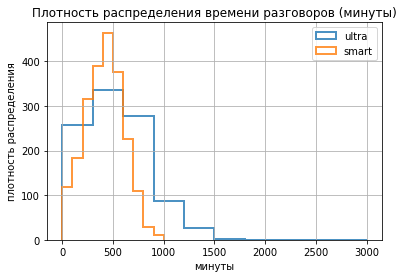

In [33]:
ax = stat_call_ultra.plot(
    y = 'call_duration',
    kind='hist',
    histtype='step',
    range=(0, 3000),
    bins=10,
    linewidth=2,
    alpha=0.8,
    label='ultra')

stat_call_smart.plot(
    y='call_duration',
    kind='hist',
    histtype='step',
    range=(0, 1000),
    bins=10,
    linewidth=2,
    alpha=0.8,
    label='smart',
    ax=ax,
    grid=True,
    legend=True,
    title = 'Плотность распределения времени разговоров (минуты)'
) 

ax.set_xlabel('минуты')
ax.set_ylabel('плотность распределения')

 



Построим гистограмму по длительности разговоров пользователей тарифа "ultra". В пакет услуг включено 3000 минут разговора. Пик, как и у пользоваталей тарифа "smart" приходится примерно на 500 минут,самое максимальное значение использованных минут - 1179. 3000 минут не расходует никто, а если быть точнее, никто не расходует даже половину предоставленного.

In [34]:
stat_call_ultra.max()

user_id                       1495
month                           12
call_duration                 1673
id                             224
mb_used                      49701
tariff                           1
city                     Ярославль
messages_included             1000
mb_per_month_included        30720
minutes_included              3000
rub_monthly_fee               1950
rub_per_gb                     150
rub_per_message                  1
rub_per_minute                   1
tariff_name                  ultra
earning                       4800
dtype: object

**Вывод**

1. По гистограммам видно, что распределение в обоих случаях близко к нормальному.
2. Среднее значение для тарифа "Смарт" - 419, а для тарифа "Ультра" - 545. В обоих случаях средние значения вписываются в минуты, входящие в пакет услуг. Но стоит обратить внимание на то, что пользователи тарифа "Смарт" довольно часто превышают лимит. Возможно, стоит подумать над оптимизацией тарифа исходя из данных этой статистики. 
3. Пользователи тарифа "Ультра" не используют даже 50% предоставленных минут в тарифе. Возможно, стоит уменьшить количество минут и сократить абнонентскую плату. 
4. По стандартным отклонениям можем сделать вывод, что разброс значений больше у тарифа "Ультра" (306), а у тарифа "Смарт"(189) значения больше сгруппированы вокруг среднего. Полагаем, что это связано с бОльшим ограничением по минутам звонков.

**3.2 Сообщения**

In [35]:
stat_msg_smart = data_sum.query('tariff_name== "smart"')
mean = stat_msg_smart['id'].mean()
var_msg_smart = np.var(stat_msg_smart['id'])
std_msg_smart = np.sqrt(var_msg_smart)


print('ТАРИФ "СМАРТ"')      
print('Среднее значение' , mean)      
print('Дисперсия' , var_msg_smart)
print('Стандартное отклонение ', std_msg_smart)

ТАРИФ "СМАРТ"
Среднее значение 33.384028712427096
Дисперсия 796.455482917076
Стандартное отклонение  28.221542886898938


In [36]:
stat_msg_ultra = data_sum.query('tariff_name== "ultra"')
mean = stat_msg_ultra['id'].mean()
var_msg_ultra = np.var(stat_msg_ultra['id'])
std_msg_ultra = np.sqrt(var_msg_ultra)

print('ТАРИФ "УЛЬТРА"')      
print('Среднее значение' , mean)      
print('Дисперсия' , var_msg_ultra)
print('Стандартное отклонение ', std_msg_ultra)

ТАРИФ "УЛЬТРА"
Среднее значение 49.36345177664975
Дисперсия 2282.946075394882
Стандартное отклонение  47.78018496610161


Построим одну гистограмму по двум тарифам для наглядности. 
Вспомним, что в пакет услуг тарифа "Смарт" входит 50 сообщений, а тарифа "Ультра" - 1000.

Text(0, 0.5, 'плотность распределения')

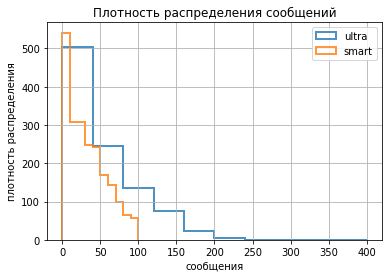

In [37]:
ax = stat_msg_ultra.plot(
    kind='hist',
    y = 'id',
    histtype='step',
    range=(0, 400),
    bins=10,
    linewidth=2,
    alpha=0.8,
    label='ultra', 
)

stat_msg_smart.plot(
    kind='hist',
    y='id',
    histtype='step',
    range=(0, 100),
    bins=10,
    linewidth=2,
    alpha=0.8,
    label='smart',
    ax=ax,
    grid=True,
    legend=True,
    title = 'Плотность распределения сообщений'
) 

ax.set_xlabel('сообщения')
ax.set_ylabel('плотность распределения')

**Вывод**

1. Среднее значение тарифа "Смарт" (33 сообщения) меньше, чем среднее значение тарифа "Ультра" (49 сообщений).
2. Большой процент пользователей тарифа "Смарт" отправляет соообщений больше, чем предоставлено в пакете тарифа. Стоит подумать над оптимизацией тарифного плана.
3. Пользователи тарифа "Ультра" не отправляют большое количество сообщений. Никто не использует предоставленный пакет даже на 50%. Полагаем, что это связано с развитием социальных сетей и мессенджеров: отправка смс отходит на второй план. Стоит подумать над оптимизацией тарифного плана.
4. Обращаем внимание, что есть пик на нуле: многие не пользуются сообщениями в принципе.

**3.3 Интернет-трафик**

In [38]:
stat_internet_smart = data_sum.query('tariff_name== "smart"')
mean = stat_internet_smart['mb_used'].mean()
var_internet_smart = np.var(stat_internet_smart['mb_used'])
std_internet_smart = np.sqrt(var_internet_smart)

print('ТАРИФ "СМАРТ"')      
print('Среднее значение' , mean)      
print('Дисперсия' , var_internet_smart)
print('Стандартное отклонение ', std_internet_smart)

ТАРИФ "СМАРТ"
Среднее значение 16187.578734858682
Дисперсия 34364391.03428983
Стандартное отклонение  5862.114894326946


In [39]:
stat_internet_ultra = data_sum.query('tariff_name== "ultra"')
mean = stat_internet_ultra['mb_used'].mean()
var_internet_ultra = np.var(stat_internet_ultra['mb_used'])
std_internet_ultra = np.sqrt(var_internet_ultra)

print('ТАРИФ "УЛЬТРА"')      
print('Среднее значение' ,  mean)      
print('Дисперсия' , var_internet_ultra)
print('Стандартное отклонение ', std_internet_ultra)

ТАРИФ "УЛЬТРА"
Среднее значение 19450.643654822336
Дисперсия 101462966.07301812
Стандартное отклонение  10072.882709185991


Построим одну гистограмму по двум тарифам для наглядности. 
Вспомним, что в пакет услуг тарифа "Смарт" входит 15ГБ интернет-трафика, а тарифа "Ультра" - 30ГБ.

Text(0, 0.5, 'плотность распределения')

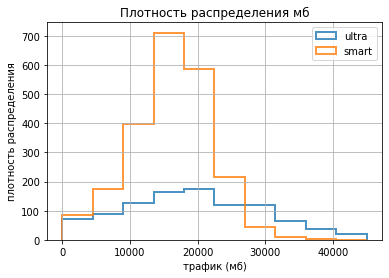

In [40]:
ax = stat_internet_ultra.plot(
    kind='hist',
    y='mb_used',
    histtype='step',
    range=(0, 45000),
    bins=10,
    linewidth=2,
    alpha=0.8,
    label= 'ultra')

stat_internet_smart.plot(
    kind='hist',
    y='mb_used',
    histtype='step',
    range=(0, 45000),
    bins=10,
    linewidth=2,
    alpha=0.8,
    label='smart',
    ax=ax,
    grid=True,
    legend=True,
    title = 'Плотность распределения мб'
) 


ax.set_xlabel('трафик (мб)')
ax.set_ylabel('плотность распределения')

Посчитаем количество включённого трафика в мегабайтах.

In [41]:
print('Трафик тарифа "Смарт":', 1024*15, "МБ")
print('Трафик тарифа "Ультра":', 1024*30, "МБ")

Трафик тарифа "Смарт": 15360 МБ
Трафик тарифа "Ультра": 30720 МБ


**Вывод**
1. Пользователи обоих тарифов не укладываются в предоставленных трафик и переплачивают за дополнительное использование интернета. Стоит оптимизировать оба тарифных плана. Это заметно на гистограмме. 
2. Среднее значение использованного интернет-трафика у пользователей тарифа "Смарт" больше предоставленного трафика в пакете услуг(16187>15360). Данный тарифный план однозначно стоит пересмотреть.

# 4. Проверка гипотез

**4.1 "Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"**

Нулевая гипотеза H0:
Средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»

Альтернативная гипотеза H1:
Средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»

Определим уровень значимости alpha = 0.05

Выборки по клиентам тарифов «Ультра» и «Смарт» не связаны друг с другом. 
Мы имеем две разные генеральные совокупности, и сопоставляем их средние. Для этого используем метод st.ttest_ind().

In [42]:
earning_smart = (data_sum.loc[data_sum['tariff_name'] == 'smart']                                       
                )
earning_ultra = (data_sum.loc[data_sum['tariff_name'] == 'ultra']                                
                )
results = st.ttest_ind(earning_smart['earning'] , earning_ultra['earning'] , equal_var=False) # считаем дисперсии выборок разными
alpha = 0.05


print('p-значение:',results.pvalue) 

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.40789217310225e-253
Отвергаем нулевую гипотезу


**4.2 "Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"**

Нулевая гипотеза H0:
Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

Альтернативная гипотеза H1:
Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов

Определим уровень значимости alpha = 0.05

Выборки по клиентам из Москвы и других регионов не связаны друг с другом.  
Мы имеем две разные генеральные совокупности, и сопоставляем их средние. Для этого используем метод st.ttest_ind().

In [43]:
earning_moscow = (data_sum
                .query('city == "Москва"')                             
                )
earning_other = (data_sum
                .query('city != "Москва"')                               
                )
results = st.ttest_ind(earning_moscow['earning'], earning_other['earning'], equal_var=False)
alpha = 0.05


print('p-значение:',results.pvalue) 

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.517656692853026
Не получилось отвергнуть нулевую гипотезу


**Вывод**

1. При проверке гипотезы о различии средней выручки пользователей тарифов "Ультра" и "Смарт" мы пришли к выводу, что выручка в действительности различается.
2. При проверке гипотезы о различии выручки пользователей из Москвы и других городов, мы пришли к выводу, что выручка примерно одинакова.

# 5. Общий вывод

1. Данные изучены.
2. Данные приведены к нужным типам.
3. Проведены дополнительные расчёты для дальнейшего анализа.
4. Проведён анализ поведения клиентов оператора.
5. Проверены гипотезы.

В данных были обнаружены нулевые значения, но они полностью оправданы и оставлены в первоначальном виде.

В результате аналитической работы мы пришли к выводам, что оба тарифа желательно оптимизировать, так как предоставленного пакета услуг не хватает пользователям тарифа Smart, а предоставленный пакет услуг в тарифе Ultra неоправданно велик и не используется в должной мере. 
Как вариант, немного увеличить стоимость тарифа Smart, увеличив в пакете услуг минуты звонков, количество сообщений и интернет-трафик, а при уменьшении абонентской платы тарифа Ultra сократить количество минут и сообщений, однако увеличить интернет-трафик.

Больше прибыли приносят пользователи тарифа "Ультра", и этот тариф лучше с точки зрения того, что пользователям меньше приходится переплачивать сверх абонентской платы. 

С помощью гипотез были сделаны выводы о том, что средняя выручка у обоих тарифов различается, но выручка пользователей из Москвы и из других городов в среднем одинакова.

